In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/Users/bijit/Downloads/TSLA.csv')

READING THE TESLA STOCK PRICES BETWEEN 2010 AND 2020

In [183]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [187]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [189]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

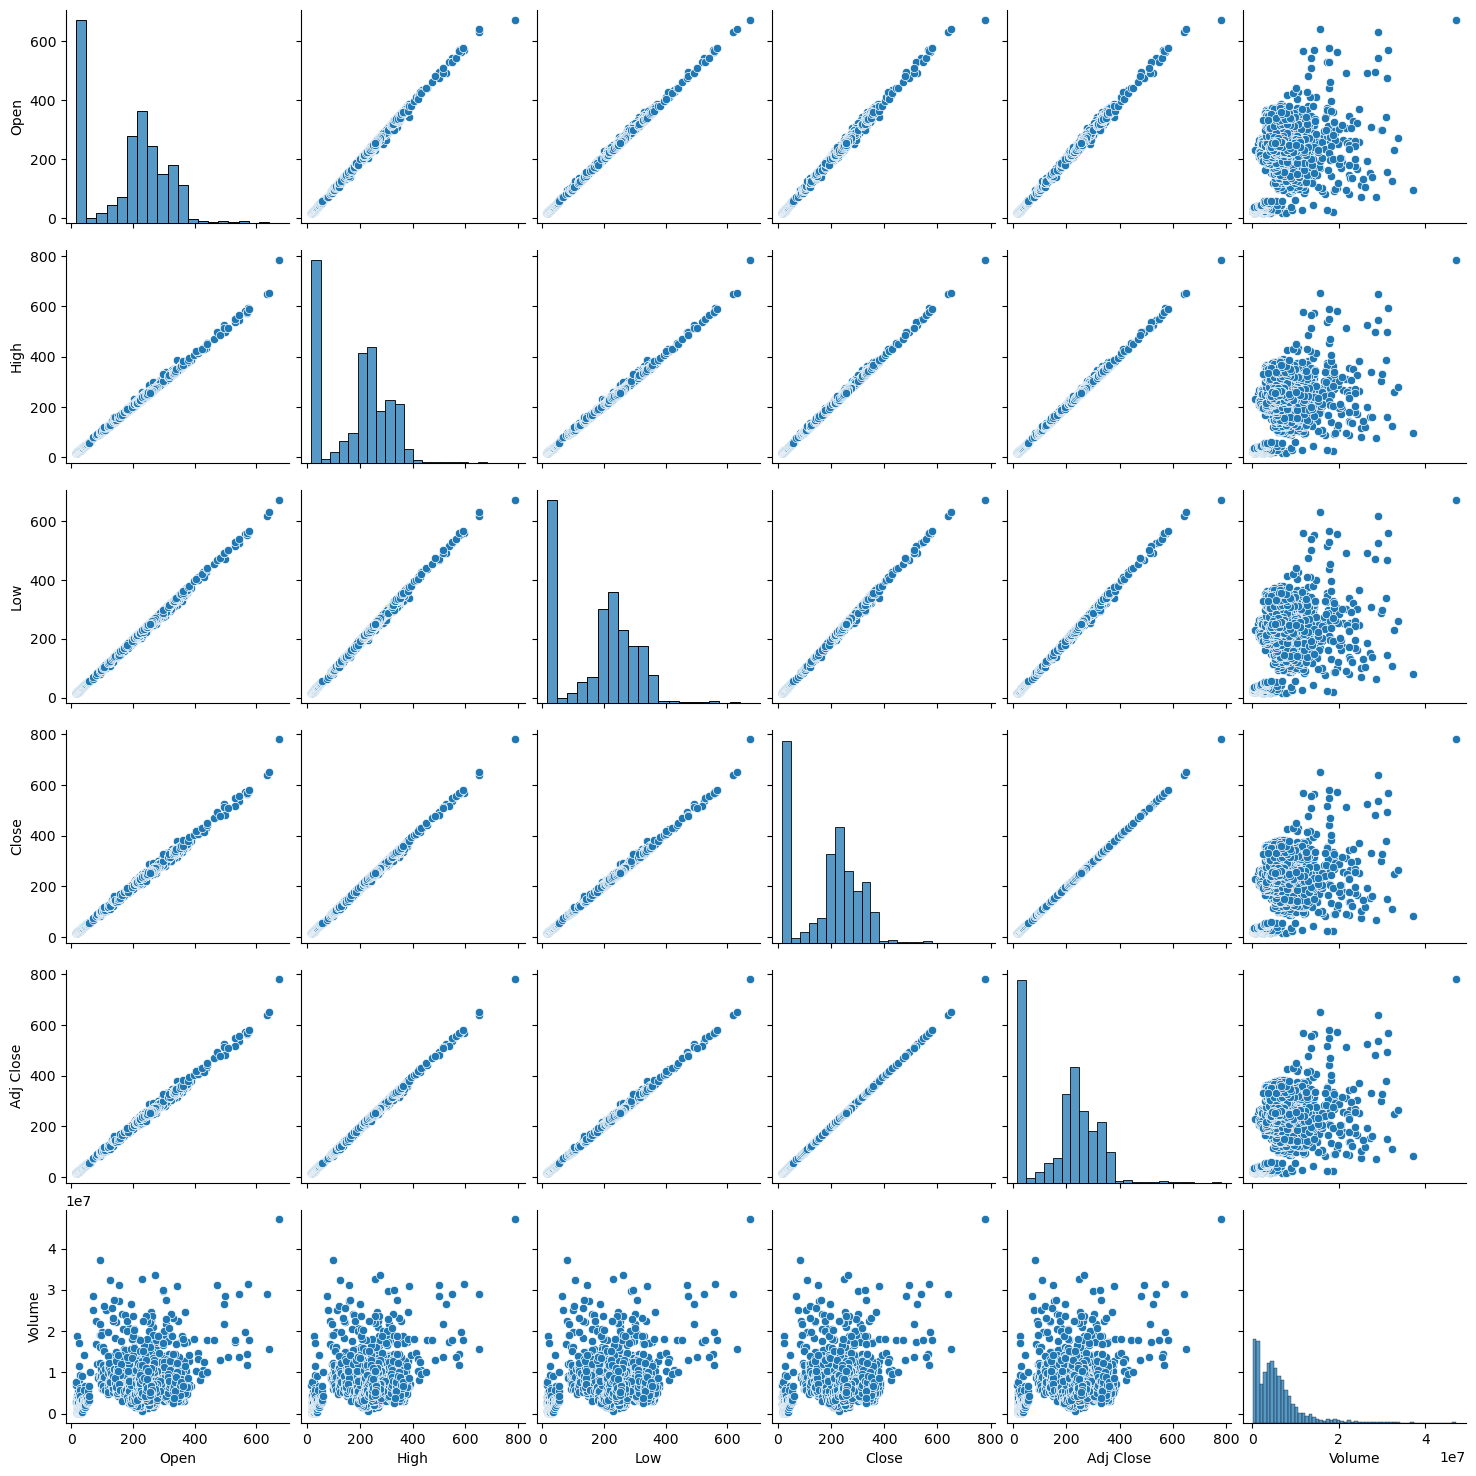

In [191]:
sns.pairplot(df)

In [193]:
#training the data. Data for reference
X = df[['Open', 'High', 'Low', 'Volume']]

In [195]:
#data for calculation
y = df['Close']

In [199]:
#importing the train_test_split function
from sklearn.model_selection import train_test_split

In [201]:
#splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [203]:
#import the linear regression algorithm
from sklearn.linear_model import LinearRegression

In [205]:
lm = LinearRegression()

In [207]:
#fitting the data
lm.fit(X_train,y_train)

LinearRegression()

In [209]:
#using the model to predict the test prices
predictions = lm.predict(X_test)

IF THE REGRESSION LINE IS NEARLY STRAIGHT, THEN THE MODEL AND ALGORITHM USED IS GOOD.

Text(0, 0.5, 'predicted values')

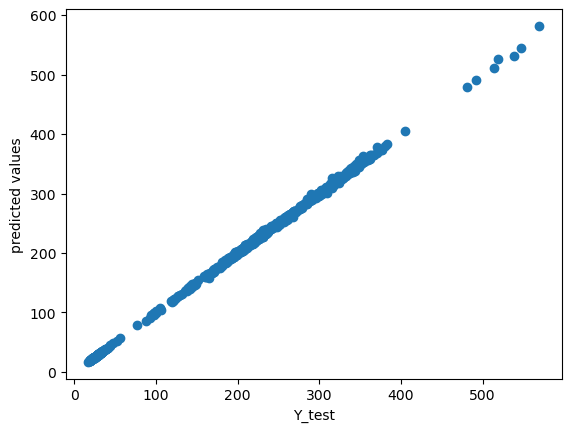

In [211]:
#plotting a scatter plot to check the regression line
plt.scatter(y_test,predictions)
plt.xlabel('Y_test')
plt.ylabel('predicted values')

In [213]:
#calculating the errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.3498886488714776
MSE: 4.250109956056633
RMSE: 2.0615794808972643


THE PLOT OF RESIDUALS SHOULD NEARLY LOOK LIKE A NORMAL DISTRIBUTION

<Axes: xlabel='Close', ylabel='Density'>

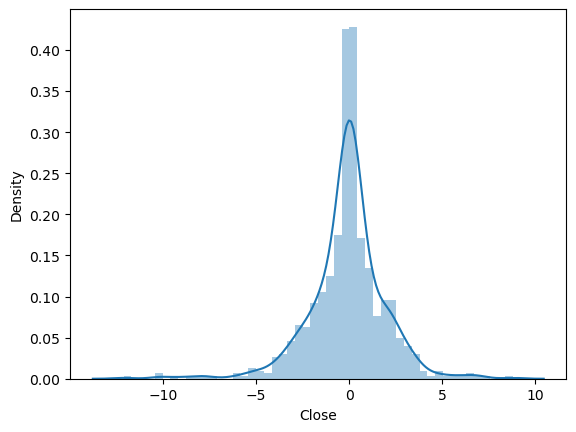

In [221]:
#creating a plot of residuals
sns.distplot((y_test-predictions),bins=50)